# Movies DataBase - Pandas overview of the data

# Data loading

In [ ]:
import pandas as pd
from datetime import datetime as dt 
import datetime
from matplotlib import pyplot as plt
import json
from collections import Counter

In [ ]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Compute total income over all movies

In [ ]:
print(movies["id"].count())
movies["revenue"].sum()

4803


395097847444

In [ ]:
movies["release_year"]= pd.DatetimeIndex(movies["release_date"]).year

In [ ]:
movies["profit"] = movies["revenue"] - movies["budget"]

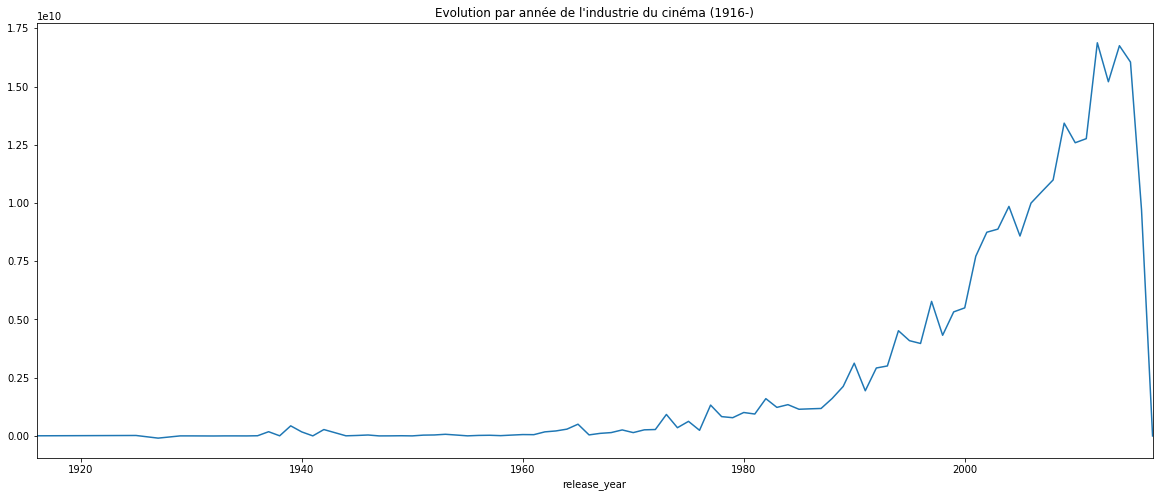

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
movies.groupby("release_year")["profit"].sum().plot(kind='line', 
                                                    ax=ax, 
                                                    title = "Evolution par année de l'industrie du cinéma (1916-)")

In [ ]:
profit_bis = movies.sort_values('profit', ascending=False)
profit_bis.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,2550965087


In [ ]:
movies["profit"].max()

2550965087

In [ ]:
movies["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
def clean_liste(a):
    a = a.str.replace("-", "")
    a = a.str.replace("'", " ")
    a = a.str.replace(",", "")
    a = a.str.replace(".","")
    a = a.str.replace("•","")
    a = a.str.upper()
    return a

In [ ]:
l_a = clean_liste(movies["overview"])
l_a_str = l_a.astype(str)

In [ ]:
Counter(l_a_str.str.split(" ").sum()).most_common(1)

[('THE', 13806)]

In [ ]:
l_origine = movies.groupby('original_language').count()
l_origine

,budget,genres,homepage,id,keywords,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,profit
original_language,,,,,,,,,,,,,,,,,,,,,
af,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ar,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2
cn,12,12,1,12,12,12,12,12,12,12,...,12,12,12,12,8,12,12,12,12,12
cs,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,2
da,7,7,2,7,7,7,7,7,7,7,...,7,7,7,7,4,7,7,7,7,7
de,27,27,11,27,27,27,26,27,27,27,...,27,27,27,27,15,27,27,27,27,27
el,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
en,4505,4505,1611,4505,4505,4505,4504,4505,4505,4505,...,4505,4504,4505,4505,3789,4505,4505,4505,4504,4505
es,32,32,12,32,32,32,32,32,32,32,...,32,32,32,32,25,32,32,32,32,32


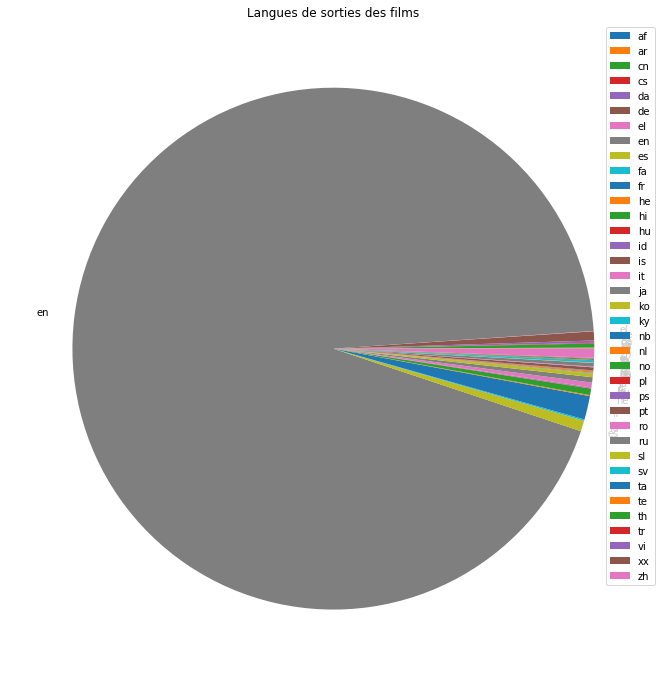

In [ ]:
l_origine["id"].plot(kind='pie', figsize = (12,12), legend = "original_language", 
               title = "Langues de sorties des films",
            label = '', startangle = 0)

In [ ]:
movies['production_countries'] = movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    l_b=[]    
    for j in range(len(i)):       
        l_b.append((i[j]['name']))
    movies.loc[index,'production_countries'] = str(l_b) 

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
def clean_liste(b):
    b = b.str.replace(' ', '')
    b = b.str.replace("''", '')
    b = b.str.strip('[]')
    b = b.str.upper()
    return b

In [ ]:
l_b1 = clean_liste(movies["production_countries"])
l_b1

0       'UNITEDSTATESOFAMERICA','UNITEDKINGDOM'
1                       'UNITEDSTATESOFAMERICA'
2       'UNITEDKINGDOM','UNITEDSTATESOFAMERICA'
3                       'UNITEDSTATESOFAMERICA'
4                       'UNITEDSTATESOFAMERICA'
                         ...                   
4798           'MEXICO','UNITEDSTATESOFAMERICA'
4799                                           
4800                    'UNITEDSTATESOFAMERICA'
4801            'UNITEDSTATESOFAMERICA','CHINA'
4802                    'UNITEDSTATESOFAMERICA'
Name: production_countries, Length: 4803, dtype: object

In [ ]:
Counter(l_b1.str.split(',').sum()).most_common(5)

[("'UNITEDSTATESOFAMERICA'", 3956),
 ("'UNITEDKINGDOM'", 636),
 ("'GERMANY'", 324),
 ("'FRANCE'", 306),
 ("'CANADA'", 261)]

In [ ]:
from pandas.io.json import json_normalize
json_normalize([{"iso_3166_1": "MX", "name": "Mexico"}, {"iso_3166_1": "FR", "name": "France"}])

,iso_3166_1,name
0,MX,Mexico
1,FR,France


In [ ]:
movies['genres']= movies['genres'].apply(json.loads)
for index,i   in zip(movies.index,movies['genres']):
    l_c =[]    
    for j in range(len(i)):       
        l_c.append((i[j]['name']))
    movies.loc[index,'genres'] = str(l_c) 

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",['United States of America'],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",['United States of America'],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
def clean_liste(c):
    c = c.str.replace(' ', '')
    c = c.str.replace("''", '')
    c = c.str.strip('[]')
    c = c.str.upper()
    return c

In [ ]:
l_c1 = clean_liste(movies["genres"])
l_c1

0       'ACTION','ADVENTURE','FANTASY','SCIENCEFICTION'
1                        'ADVENTURE','FANTASY','ACTION'
2                          'ACTION','ADVENTURE','CRIME'
3                   'ACTION','CRIME','DRAMA','THRILLER'
4                 'ACTION','ADVENTURE','SCIENCEFICTION'
                             ...                       
4798                        'ACTION','CRIME','THRILLER'
4799                                 'COMEDY','ROMANCE'
4800               'COMEDY','DRAMA','ROMANCE','TVMOVIE'
4801                                                   
4802                                      'DOCUMENTARY'
Name: genres, Length: 4803, dtype: object

In [ ]:
Counter(l_c1.str.split(',').sum()).most_common(1)

[("'DRAMA'", 2297)]

In [ ]:
l_d = movies[['genres','vote_average','vote_count', 'title']]
l_d.head()

,genres,vote_average,vote_count,title
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",7.2,11800,Avatar
1,"['Adventure', 'Fantasy', 'Action']",6.9,4500,Pirates of the Caribbean: At World's End
2,"['Action', 'Adventure', 'Crime']",6.3,4466,Spectre
3,"['Action', 'Crime', 'Drama', 'Thriller']",7.6,9106,The Dark Knight Rises
4,"['Action', 'Adventure', 'Science Fiction']",6.1,2124,John Carter


In [ ]:
l_d["produit"] = l_d["vote_average"]*l_d["vote_count"]
l_d

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,genres,vote_average,vote_count,title,produit
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",7.2,11800,Avatar,84960.0
1,"['Adventure', 'Fantasy', 'Action']",6.9,4500,Pirates of the Caribbean: At World's End,31050.0
2,"['Action', 'Adventure', 'Crime']",6.3,4466,Spectre,28135.8
3,"['Action', 'Crime', 'Drama', 'Thriller']",7.6,9106,The Dark Knight Rises,69205.6
4,"['Action', 'Adventure', 'Science Fiction']",6.1,2124,John Carter,12956.4
...,...,...,...,...,...
4798,"['Action', 'Crime', 'Thriller']",6.6,238,El Mariachi,1570.8
4799,"['Comedy', 'Romance']",5.9,5,Newlyweds,29.5
4800,"['Comedy', 'Drama', 'Romance', 'TV Movie']",7.0,6,"Signed, Sealed, Delivered",42.0
4801,[],5.7,7,Shanghai Calling,39.9


In [ ]:
Counter(l_c1.str.split(',').sum())

Counter({"'ACTION'": 1154,
         "'ADVENTURE'": 790,
         "'FANTASY'": 424,
         "'SCIENCEFICTION'": 535,
         "'CRIME'": 696,
         "'DRAMA'": 2297,
         "'THRILLER'": 1274,
         "'ANIMATION'": 234,
         "'FAMILY'": 513,
         "'WESTERN'": 82,
         "'COMEDY'": 1722,
         "'ROMANCE'": 894,
         "'HORROR'": 519,
         "'MYSTERY'": 348,
         "'HISTORY'": 197,
         "'WAR'": 144,
         "'MUSIC'": 185,
         "'DOCUMENTARY'": 110,
         "'FOREIGN'": 34,
         "'TVMOVIE'": 8,
         '': 28})

In [ ]:
l_mask = l_d["genres"].apply(lambda x: isinstance(x, str) and "'Action'" in x)
l_d[l_mask]

,genres,vote_average,vote_count,title,produit
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",7.2,11800,Avatar,84960.0
1,"['Adventure', 'Fantasy', 'Action']",6.9,4500,Pirates of the Caribbean: At World's End,31050.0
2,"['Action', 'Adventure', 'Crime']",6.3,4466,Spectre,28135.8
3,"['Action', 'Crime', 'Drama', 'Thriller']",7.6,9106,The Dark Knight Rises,69205.6
4,"['Action', 'Adventure', 'Science Fiction']",6.1,2124,John Carter,12956.4
...,...,...,...,...,...
4734,"['Thriller', 'Action', 'Drama', 'Science Ficti...",5.0,1,Echo Dr.,5.0
4769,"['Action', 'Western']",0.0,0,The Legend of God's Gun,0.0
4772,"['Drama', 'Action', 'Comedy']",6.3,26,Down Terrace,163.8
4778,"['Action', 'Drama', 'Crime', 'Thriller']",6.0,131,Rampage,786.0


In [ ]:
moyenne_action = l_d[l_mask]
moyenne_action

,genres,vote_average,vote_count,title,produit
0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",7.2,11800,Avatar,84960.0
1,"['Adventure', 'Fantasy', 'Action']",6.9,4500,Pirates of the Caribbean: At World's End,31050.0
2,"['Action', 'Adventure', 'Crime']",6.3,4466,Spectre,28135.8
3,"['Action', 'Crime', 'Drama', 'Thriller']",7.6,9106,The Dark Knight Rises,69205.6
4,"['Action', 'Adventure', 'Science Fiction']",6.1,2124,John Carter,12956.4
...,...,...,...,...,...
4734,"['Thriller', 'Action', 'Drama', 'Science Ficti...",5.0,1,Echo Dr.,5.0
4769,"['Action', 'Western']",0.0,0,The Legend of God's Gun,0.0
4772,"['Drama', 'Action', 'Comedy']",6.3,26,Down Terrace,163.8
4778,"['Action', 'Drama', 'Crime', 'Thriller']",6.0,131,Rampage,786.0


In [ ]:
moyenne_action["produit"].sum()/moyenne_action["vote_count"].sum()

6.643429462971016

In [ ]:
brad = credits[credits["cast"].str.contains("Brad Pitt").fillna(False)]
brad.count()

movie_id    38
title       38
cast        38
crew        38
dtype: int64

In [ ]:
fusion = pd.merge(credits,
                 movies[['release_date', 'title']],
                  how ='left') 
fusion.head()

,movie_id,title,cast,crew,release_date
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07


In [ ]:
AJ = fusion[fusion["cast"].str.contains("Angelina Jolie").fillna(False)]
AJ.groupby("release_date").max()

,movie_id,title,cast,crew
release_date,,,,
1995-09-14,10428,Hackers,"[{""cast_id"": 16, ""character"": ""Dade Murphy / '...","[{""credit_id"": ""52fe436e9251416c750100bb"", ""de..."
1999-04-23,12596,Pushing Tin,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de..."
1999-11-04,9481,The Bone Collector,"[{""cast_id"": 1, ""character"": ""Lincoln Rhyme"", ...","[{""credit_id"": ""52fe44fdc3a36847f80b61e7"", ""de..."
1999-12-21,3558,"Girl, Interrupted","[{""cast_id"": 14, ""character"": ""Susanna Kaysen""...","[{""credit_id"": ""52fe439cc3a36847f806189f"", ""de..."
2000-06-09,9679,Gone in Sixty Seconds,"[{""cast_id"": 1, ""character"": ""Randall 'Memphis...","[{""credit_id"": ""52fe451ac3a36847f80bc99f"", ""de..."
2001-06-11,1995,Lara Croft: Tomb Raider,"[{""cast_id"": 12, ""character"": ""Lara Croft"", ""c...","[{""credit_id"": ""568685039251412e5201dbcf"", ""de..."
2001-08-03,2057,Original Sin,"[{""cast_id"": 17, ""character"": ""Julia Russell/B...","[{""credit_id"": ""52fe4330c3a36847f80412ff"", ""de..."
2002-04-26,16643,Life or Something Like It,"[{""cast_id"": 1, ""character"": ""Lanie Kerrigan"",...","[{""credit_id"": ""54a456919251414d2700d04c"", ""de..."
2003-07-21,1996,Lara Croft Tomb Raider: The Cradle of Life,"[{""cast_id"": 11, ""character"": ""Lara Croft"", ""c...","[{""credit_id"": ""52fe432ac3a36847f803f41d"", ""de..."


In [ ]:
AJ.groupby("release_date").max().head(1)

,movie_id,title,cast,crew
release_date,,,,
1995-09-14,10428,Hackers,"[{""cast_id"": 16, ""character"": ""Dade Murphy / '...","[{""credit_id"": ""52fe436e9251416c750100bb"", ""de..."
